[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Python split(): ['technology', 'fascinates', 'me', 'because', 'of', 'its', 'transformative', 'power', 'in', 'our', 'lives', 'from', 'smartphones', 'to', 'ai', 'every', 'advancement', 'reshapes', 'how', 'we', 'communicate', 'learn', 'and', 'interact', 'with', 'the', 'world', 'innovations', 'like', 'virtual', 'reality', 'and', 'robotics', 'push', 'the', 'boundaries', 'of', 'imagination', 'although', 'concerns', 'like', 'privacy', 'exist', 'responsible', 'tech', 'can', 'improve', 'healthcare', 'education', 'and', 'connectivity', 'in', 'the', 'future', 'i', 'believe', 'technology', 'will', 'continue', 'to', 'simplify', 'tasks', 'and', 'bridge', 'global', 'gaps']
NLTK word_tokenize(): ['technology', 'fascinates', 'me', 'because', 'of', 'its', 'transformative', 'power', 'in', 'our', 'lives', 'from', 'smartphones', 'to', 'ai', 'every', 'advancement', 'reshapes', 'how', 'we', 'communicate', 'learn', 'and', 'interact', 'with', 'the', 'world', 'innovations', 'like', 'virtual', 'reality', 'and', 

<Axes: title={'center': 'Top Words (Excluding Stopwords)'}, xlabel='Samples', ylabel='Counts'>

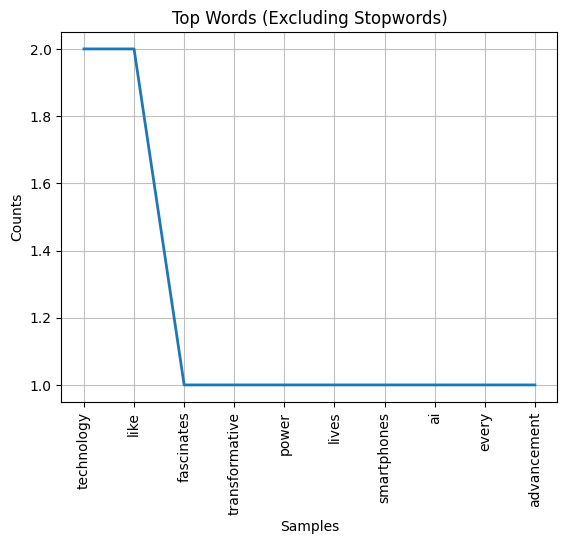

In [1]:
import re
import nltk
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist


nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

text = """Technology fascinates me because of its transformative power in our lives.
From smartphones to AI, every advancement reshapes how we communicate, learn, and interact with the world.
Innovations like virtual reality and robotics push the boundaries of imagination.
Although concerns like privacy exist, responsible tech can improve healthcare, education, and connectivity.
In the future, I believe technology will continue to simplify tasks and bridge global gaps."""

text_clean = re.sub(r'[^\w\s]', '', text.lower())


sent_tokens = sent_tokenize(text)
word_tokens = word_tokenize(text_clean)


split_words = text_clean.split()
print("Python split():", split_words)
print("NLTK word_tokenize():", word_tokens)


stop_words = set(stopwords.words("english"))
filtered_words = [word for word in word_tokens if word not in stop_words]

fd = FreqDist(filtered_words)
print("\nWord Frequency (Top 10):", fd.most_common(10))
fd.plot(10, title="Top Words (Excluding Stopwords)")


In [2]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

text = """Technology continues to evolve, influencing every aspect of our lives.
From smartphones to smart homes, innovation drives the future forward with powerful ideas.
Artificial intelligence, virtual reality, and robotics are no longer futuristic concepts but active fields.
As tech advances, ethical concerns and digital literacy become more important than ever before."""

words_alpha = re.findall(r'\b[a-zA-Z]+\b', text)
print("Words with only alphabets:\n", words_alpha)


stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words_alpha if word.lower() not in stop_words]
print("\nWords after stopword removal:\n", filtered_words)

ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in filtered_words]
print("\nStemmed words:\n", stemmed_words)

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in filtered_words]
print("\nLemmatized words:\n", lemmatized_words)


print("\nComparison (Original vs Stemmed vs Lemmatized):")
for orig, stem, lemma in zip(filtered_words, stemmed_words, lemmatized_words):
    print(f"{orig} -> Stemmed: {stem}, Lemmatized: {lemma}")

print("""
 Explanation:
- Stemming often produces root forms that are not real words (e.g., 'advances' → 'advanc').
- Lemmatization returns real base forms based on dictionary meaning (e.g., 'advances' → 'advance').
- Prefer stemming for quick preprocessing in tasks like spam filtering.
- Prefer lemmatization when you want grammatically correct words, such as in language modeling or summarization.
""")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Words with only alphabets:
 ['Technology', 'continues', 'to', 'evolve', 'influencing', 'every', 'aspect', 'of', 'our', 'lives', 'From', 'smartphones', 'to', 'smart', 'homes', 'innovation', 'drives', 'the', 'future', 'forward', 'with', 'powerful', 'ideas', 'Artificial', 'intelligence', 'virtual', 'reality', 'and', 'robotics', 'are', 'no', 'longer', 'futuristic', 'concepts', 'but', 'active', 'fields', 'As', 'tech', 'advances', 'ethical', 'concerns', 'and', 'digital', 'literacy', 'become', 'more', 'important', 'than', 'ever', 'before']

Words after stopword removal:
 ['Technology', 'continues', 'evolve', 'influencing', 'every', 'aspect', 'lives', 'smartphones', 'smart', 'homes', 'innovation', 'drives', 'future', 'forward', 'powerful', 'ideas', 'Artificial', 'intelligence', 'virtual', 'reality', 'robotics', 'longer', 'futuristic', 'concepts', 'active', 'fields', 'tech', 'advances', 'ethical', 'concerns', 'digital', 'literacy', 'become', 'important', 'ever']

Stemmed words:
 ['technolog', '

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

texts = [
    "The new phone has great features and battery life.",
    "Camera quality is decent, but battery drains fast.",
    "Not happy with the screen resolution and speed."
]


cv = CountVectorizer()
bow = cv.fit_transform(texts)
df_bow = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names_out())
print("Bag of Words:\n", df_bow)


tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print("\nTF-IDF:\n", df_tfidf)

for i, row in enumerate(df_tfidf.values):
    top_indices = row.argsort()[-3:][::-1]
    keywords = [df_tfidf.columns[j] for j in top_indices]
    print(f"Top 3 keywords for Text {i+1}: {keywords}")


Bag of Words:
    and  battery  but  camera  decent  drains  fast  features  great  happy  \
0    1        1    0       0       0       0     0         1      1      0   
1    0        1    1       1       1       1     1         0      0      0   
2    1        0    0       0       0       0     0         0      0      1   

   ...  life  new  not  phone  quality  resolution  screen  speed  the  with  
0  ...     1    1    0      1        0           0       0      0    1     0  
1  ...     0    0    0      0        1           0       0      0    0     0  
2  ...     0    0    1      0        0           1       1      1    1     1  

[3 rows x 22 columns]

TF-IDF:
         and   battery       but    camera    decent    drains      fast  \
0  0.273450  0.273450  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.276265  0.363255  0.363255  0.363255  0.363255  0.363255   
2  0.284285  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

   features     great 

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

text1 = "Artificial Intelligence helps machines learn and adapt over time."
text2 = "Blockchain provides a secure, decentralized way to record data."


stopwords = set(nltk.corpus.stopwords.words("english"))
tokens1 = [w for w in nltk.word_tokenize(text1.lower()) if w.isalpha() and w not in stopwords]
tokens2 = [w for w in nltk.word_tokenize(text2.lower()) if w.isalpha() and w not in stopwords]

# Jaccard Similarity
set1, set2 = set(tokens1), set(tokens2)
jaccard_sim = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard_sim)

# Cosine Similarity
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf[0:1], tfidf[1:2])
print("Cosine Similarity:", cosine_sim[0][0])


Jaccard Similarity: 0.0
Cosine Similarity: 0.0


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


TextBlob - Polarity: 0.44999999999999996
TextBlob - Subjectivity: 0.6699999999999999
VADER Scores: {'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.7897}
Final Sentiment: Positive


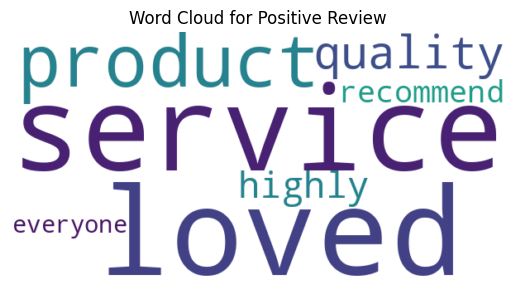

In [5]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

nltk.download('vader_lexicon')

review = "I loved the service and product quality. Would highly recommend it to everyone!"


blob = TextBlob(review)
print("TextBlob - Polarity:", blob.sentiment.polarity)
print("TextBlob - Subjectivity:", blob.sentiment.subjectivity)


sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores(review)
print("VADER Scores:", scores)


compound = scores['compound']
if compound >= 0.05:
    sentiment = "Positive"
elif compound <= -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print("Final Sentiment:", sentiment)

# Word Cloud
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(review)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Review")
plt.show()

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

paragraph = """Natural language processing is a core area of artificial intelligence.
It focuses on enabling computers to understand and generate human language."""


tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1


input_sequences = []
for sentence in nltk.sent_tokenize(paragraph):
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])


max_seq_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))


X = input_sequences[:, :-1]
y = to_categorical(input_sequences[:, -1], num_classes=total_words)


model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_seq_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=200, verbose=1)


seed_text = "language"
next_words = 5
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0).argmax()
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            seed_text += " " + word
            break

print("Generated Text:", seed_text)


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0526 - loss: 3.0454
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1053 - loss: 3.0431
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1579 - loss: 3.0407
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2105 - loss: 3.0383
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1053 - loss: 3.0357
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.1053 - loss: 3.0329
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1053 - loss: 3.0297
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1053 - loss: 3.0262
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1053 - loss: 3.0222
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1053 - loss: 3.0176
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1053 - loss: 3.0122
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1053 - loss: 3.0060
Ep